<a href="https://colab.research.google.com/github/itz-sabyasachi/Final-AQI-Time-Series-model-V1/blob/main/movie_revenue_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from scipy.stats import ttest_ind, f_oneway, pearsonr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import statsmodels.api as sm

In [ ]:
df = pd.read_csv("/content/tmdb_movies_data.csv")

In [ ]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00


In [ ]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [ ]:
df.isnull().sum()

,0
id,0
imdb_id,10
popularity,0
budget,0
revenue,0
original_title,0
cast,76
homepage,7930
director,44
tagline,2824


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10866.0,6.606418e+04,9.213014e+04,5.000000,10596.250000,20669.000000,7.561000e+04,4.178590e+05
popularity,10866.0,6.464410e-01,1.000185e+00,0.000065,0.207583,0.383856,7.138170e-01,3.298576e+01
budget,10866.0,1.462570e+07,3.091321e+07,0.000000,0.000000,0.000000,1.500000e+07,4.250000e+08
revenue,10866.0,3.982332e+07,1.170035e+08,0.000000,0.000000,0.000000,2.400000e+07,2.781506e+09
runtime,10866.0,1.020709e+02,3.138141e+01,0.000000,90.000000,99.000000,1.110000e+02,9.000000e+02
vote_count,10866.0,2.173897e+02,5.756191e+02,10.000000,17.000000,38.000000,1.457500e+02,9.767000e+03
vote_average,10866.0,5.974922e+00,9.351418e-01,1.500000,5.400000,6.000000,6.600000e+00,9.200000e+00
release_year,10866.0,2.001323e+03,1.281294e+01,1960.000000,1995.000000,2006.000000,2.011000e+03,2.015000e+03
budget_adj,10866.0,1.755104e+07,3.430616e+07,0.000000,0.000000,0.000000,2.085325e+07,4.250000e+08
revenue_adj,10866.0,5.136436e+07,1.446325e+08,0.000000,0.000000,0.000000,3.369710e+07,2.827124e+09


- Handling Missing values

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [ ]:
# 2. Fill numeric missing values with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [ ]:
# 3. Fill categorical missing values with "Unknown"
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

In [ ]:
# Check remaining nulls
print(df.isnull().sum().sum(), "missing values left")

0 missing values left


In [ ]:
df.isnull().sum()

,0
id,0
imdb_id,0
popularity,0
budget,0
revenue,0
original_title,0
cast,0
homepage,0
director,0
tagline,0


In [ ]:
numerical_features = ['budget', 'runtime', 'vote_count', 'vote_average']

In [ ]:
for feature in numerical_features:
    X = sm.add_constant(df[feature])  # adds intercept term
    y = df['revenue']

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
print(f"--- {feature} ---")
print(model.summary())

--- vote_average ---
                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     333.4
Date:                Mon, 08 Dec 2025   Prob (F-statistic):           2.13e-73
Time:                        18:06:22   Log-Likelihood:            -2.1712e+05
No. Observations:               10866   AIC:                         4.342e+05
Df Residuals:                   10864   BIC:                         4.343e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.918e+07   7

- Trying with multiple linear regression

In [ ]:
X = df[['budget', 'runtime', 'vote_count', 'vote_average']]
X = sm.add_constant(X)
y = df['revenue']

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     6897.
Date:                Mon, 08 Dec 2025   Prob (F-statistic):               0.00
Time:                        18:06:22   Log-Likelihood:            -2.1041e+05
No. Observations:               10866   AIC:                         4.208e+05
Df Residuals:                   10861   BIC:                         4.209e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.801e+06   4.22e+06     -1.848      0.065   -1.61e+07    4.72e+05
budget           1.4812      0.025     58.589      0.000       1.432       1.531
runtime      -4387.5730   1.96e+04     -0.224      0.823   -4.28e+04     3.4e+04
vote_count    1.104e+05   1387.473     79.541      0.000    1.08e+05    1.13e+05
vote_average  4.045e+05    6.7e+05      0.604      0.546   -9.08e+05    1.72e+06
==============================================================================
Omnibus:                    11097.269   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3363933.635
Skew:                           4.465   Prob(JB):                         0.00
Kurtosis:                      88.734   Cond. No.                     2.44e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- For chategorical Data

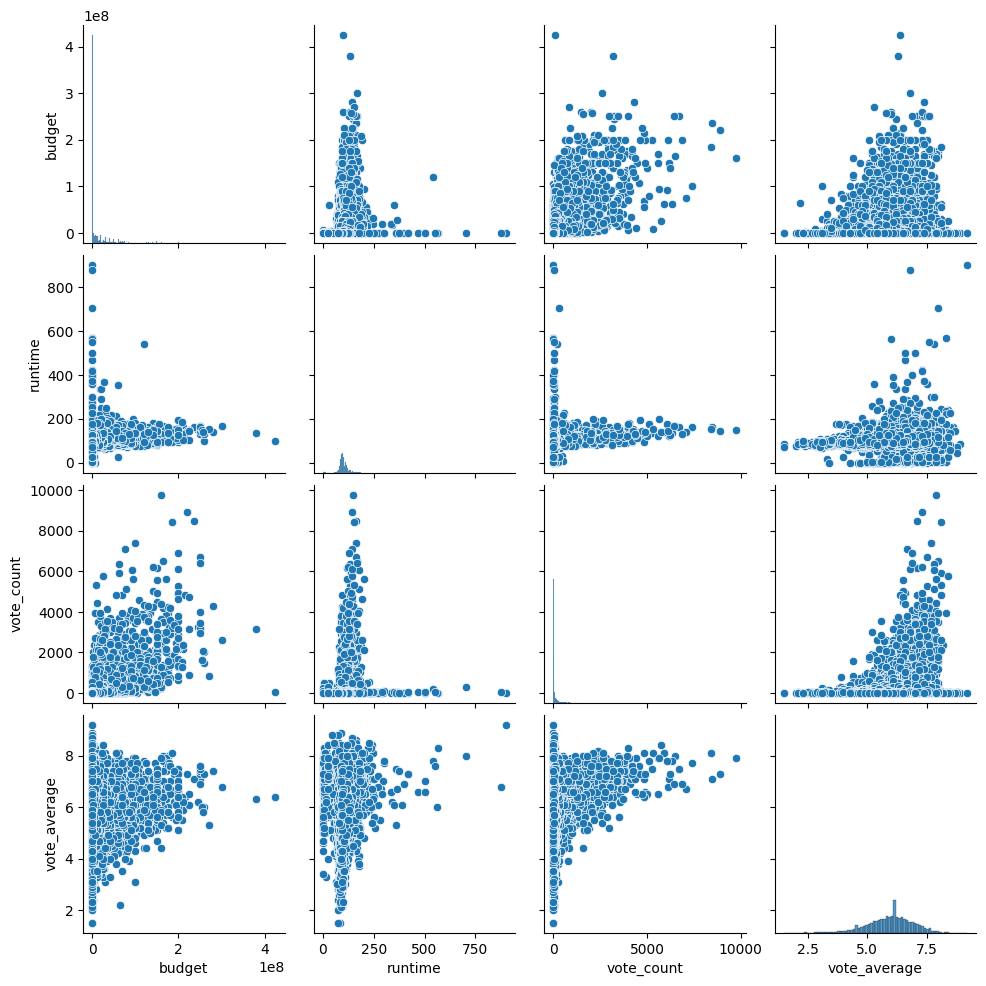

In [ ]:
sns.pairplot(df[numerical_features])
plt.show()

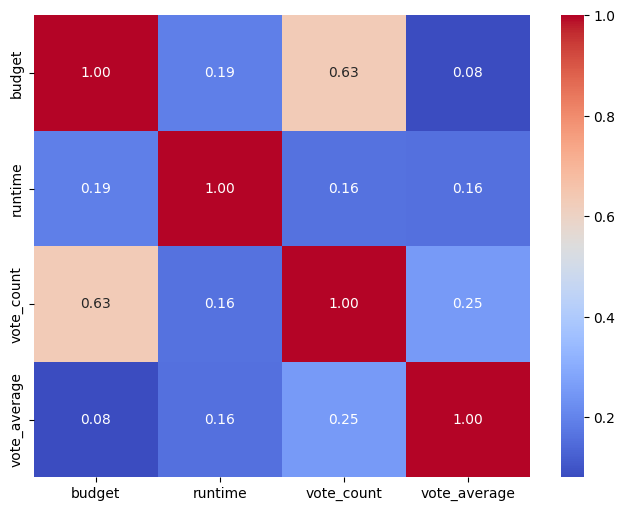

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8,6))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [ ]:
df['log_revenue'] = np.log1p(df['revenue'])
df['log_budget'] = np.log1p(df['budget'])

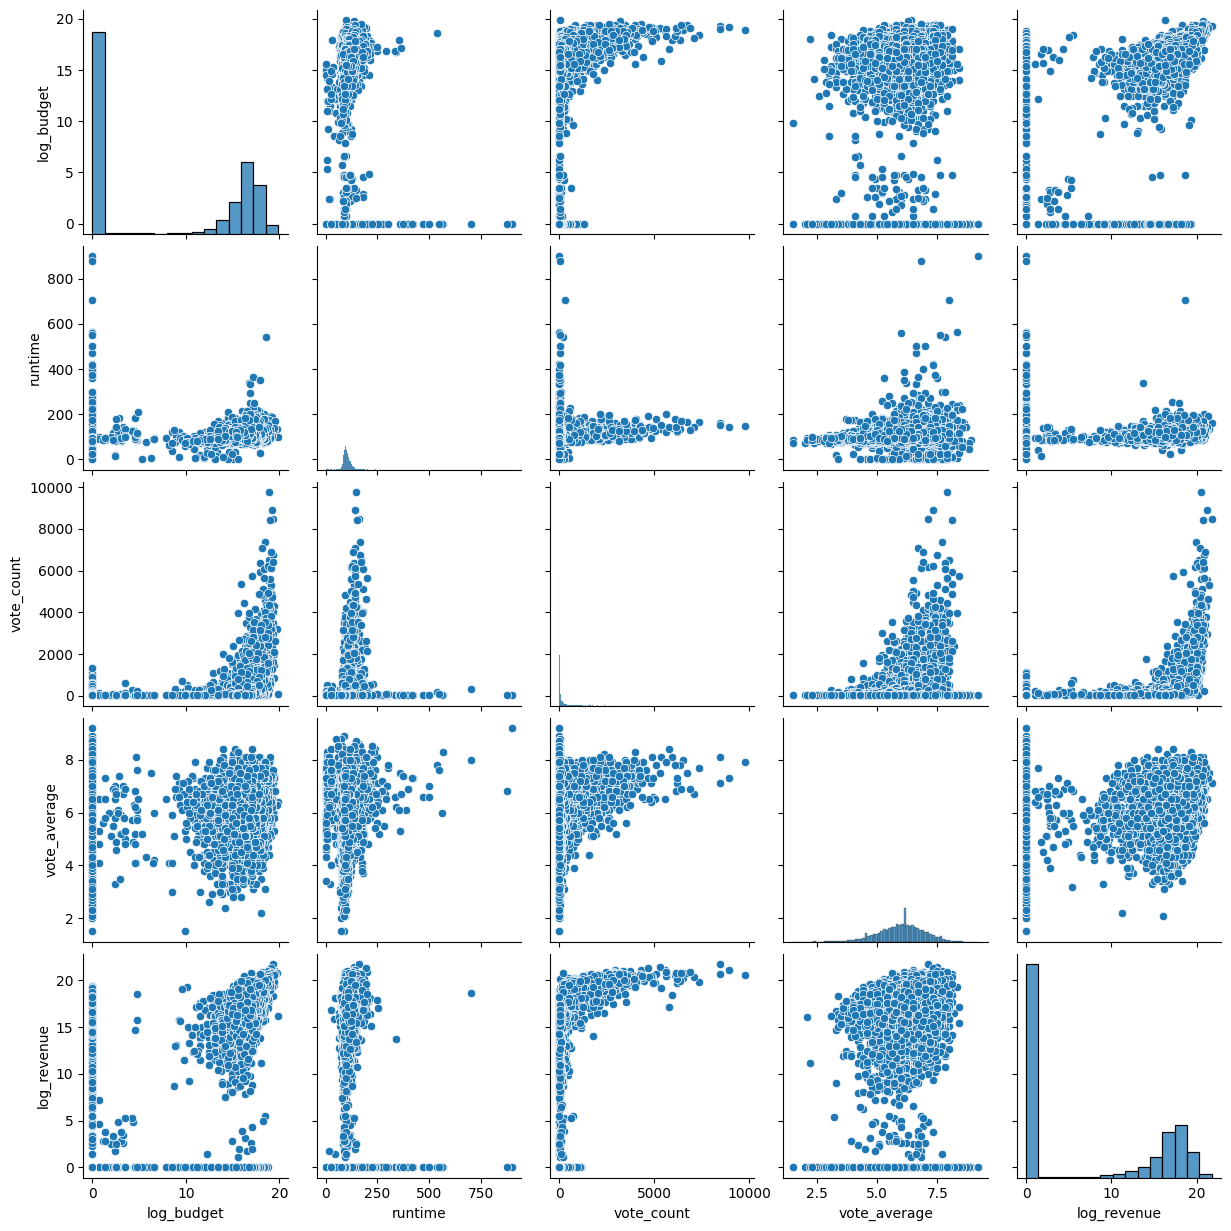

In [ ]:
sns.pairplot(df[['log_budget', 'runtime', 'vote_count', 'vote_average', 'log_revenue']])
plt.show()

- Checking OLS with log transformed variables

In [ ]:
X = df[['log_budget', 'runtime', 'vote_count', 'vote_average']]
X = sm.add_constant(X)
y = df['log_revenue']

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_revenue   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     2315.
Date:                Mon, 08 Dec 2025   Prob (F-statistic):               0.00
Time:                        18:06:33   Log-Likelihood:                -35331.
No. Observations:               10866   AIC:                         7.067e+04
Df Residuals:                   10861   BIC:                         7.071e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.9388      0.425     -9.277      0.000      -4.771      -3.107
log_budget       0.5790      0.008     73.624      0.000       0.564       0.594
runtime          0.0121      0.002      6.173      0.000       0.008       0.016
vote_count       0.0026      0.000     22.856      0.000       0.002       0.003
vote_average     0.8556      0.067     12.795      0.000       0.725       0.987
==============================================================================
Omnibus:                       45.731   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.708
Skew:                           0.123   Prob(JB):                     1.61e-11
Kurtosis:                       3.222   Cond. No.                     4.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Keeping important variables only
numeric_features = ['log_budget', 'vote_count', 'vote_average']

- Handling chategorical Data

In [ ]:
high_card_cols = ['director', 'cast', 'production_companies','keywords']

In [ ]:
for col in high_card_cols:
  freq = df[col].value_counts()
  df[f'{col}_freq'] = df[col].map(freq)
  df.drop(columns=[col], inplace=True)

In [ ]:
def get_first_genre_pipe(s):
    if pd.isna(s):
        return "Unknown"
    s = str(s).strip()
    if s == "" or s.lower() == "unknown":
        return "Unknown"
    return s.split("|")[0]   # first genre

In [ ]:
df["genre"] = df["genres"].apply(get_first_genre_pipe)

In [ ]:
df["genre"].value_counts().head(20)

,count
genre,
Drama,2453
Comedy,2319
Action,1590
Horror,915
Adventure,586
Thriller,491
Documentary,432
Animation,403
Crime,381


In [ ]:
print(df['genre'].unique()[:20])
print(len(df['genre'].unique()))

['Action' 'Adventure' 'Western' 'Science Fiction' 'Drama' 'Family'
 'Comedy' 'Crime' 'Romance' 'War' 'Mystery' 'Thriller' 'Fantasy' 'History'
 'Animation' 'Horror' 'Music' 'Documentary' 'TV Movie' 'Unknown']
21


In [ ]:
low_card_cols = ['genres']

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
for col in low_card_cols:
    if col not in df.columns:
        continue

    # Build OLS model treating column as categorical
    formula = f"log_revenue ~ C({col})"
    model = smf.ols(formula=formula, data=df).fit()

    # Generate ANOVA table
    anova_table = sm.stats.anova_lm(model, typ=2)

    print(f"--- {col} ---")
    print(anova_table)

    # Check significance
    p_val = anova_table['PR(>F)'].iloc[0]  # Use iloc to avoid future warning
    if p_val < 0.05:
        print(f"  -> Significant relation with log_revenue.\n")
    else:
        print(f"  -> Not significantly related.\n")

--- genres ---
                  sum_sq      df        F        PR(>F)
C(genres)  216970.001110  2039.0  1.64926  4.407964e-52
Residual   569452.170314  8826.0      NaN           NaN
  -> Significant relation with log_revenue.



In [ ]:
print(df['genre'].head(20))
print(df['genre'].unique())
print(len(df['genre'].unique()))

0              Action
1              Action
2           Adventure
3              Action
4              Action
5             Western
6     Science Fiction
7               Drama
8              Family
9              Comedy
10             Action
11    Science Fiction
12              Drama
13             Action
14             Action
15              Crime
16              Crime
17    Science Fiction
18            Romance
19                War
Name: genre, dtype: object
['Action' 'Adventure' 'Western' 'Science Fiction' 'Drama' 'Family'
 'Comedy' 'Crime' 'Romance' 'War' 'Mystery' 'Thriller' 'Fantasy' 'History'
 'Animation' 'Horror' 'Music' 'Documentary' 'TV Movie' 'Unknown' 'Foreign']
21


In [ ]:
df = pd.get_dummies(df, columns=['genre'], drop_first=True)

In [ ]:
print("\nTotal columns after encoding:", df.shape[1])


Total columns after encoding: 43


- Studying relations between chategorical data

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
high_card_cols = ['director', 'cast', 'production_companies']

In [ ]:
for col in high_card_cols:
  freq_col = f"{col}_freq"

  if freq_col in df.columns:
      corr = df[freq_col].corr(df['log_revenue'])
      print(f"{freq_col}: correlation with log_revenue = {corr:.4f}\n")
  else:
      print(f"{freq_col} not found (apply frequency encoding first).\n")

director_freq: correlation with log_revenue = 0.2260

cast_freq: correlation with log_revenue = -0.0656

production_companies_freq: correlation with log_revenue = -0.2304



In [ ]:
print(list(df.columns))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'homepage', 'tagline', 'overview', 'runtime', 'genres', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj', 'log_revenue', 'log_budget', 'director_freq', 'cast_freq', 'production_companies_freq', 'keywords_freq', 'genre_Adventure', 'genre_Animation', 'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama', 'genre_Family', 'genre_Fantasy', 'genre_Foreign', 'genre_History', 'genre_Horror', 'genre_Music', 'genre_Mystery', 'genre_Romance', 'genre_Science Fiction', 'genre_TV Movie', 'genre_Thriller', 'genre_Unknown', 'genre_War', 'genre_Western']


- Finalizing Features

In [ ]:
numeric_features = ['log_budget', 'vote_count', 'vote_average']

In [ ]:
final_cols = [
    'log_revenue',
    'log_budget',
    'vote_count',
    'vote_average',
    'director_freq',
    'cast_freq',
    'production_companies_freq'
]

In [ ]:
# Add all encoded genre columns dynamically
genre_cols = [col for col in df.columns if col.startswith('genre_')]

In [ ]:
final_df = df[final_cols + genre_cols]

In [ ]:
final_df

,log_revenue,log_budget,vote_count,vote_average,director_freq,cast_freq,production_companies_freq,genre_Adventure,genre_Animation,genre_Comedy,...,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_Unknown,genre_War,genre_Western
0,21.137710,18.826146,5562,6.5,2,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,19.751558,18.826146,6185,7.1,8,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,19.503293,18.515991,2480,6.3,5,1,1,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,21.449934,19.113828,5292,7.5,5,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,21.132889,19.062535,2947,7.3,8,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.000000,0.000000,11,7.4,1,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10862,0.000000,0.000000,20,5.7,9,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10863,0.000000,0.000000,11,6.5,2,1,4,False,False,False,...,False,False,True,False,False,False,False,False,False,False
10864,0.000000,0.000000,22,5.4,45,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


- Preparing data to train model

In [ ]:
X = final_df.drop('log_revenue', axis=1)
y = final_df['log_revenue']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Scaling numeric features using standard scaler
numeric_features = ['log_budget', 'vote_count', 'vote_average']
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

- Training Linear Regression Model

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_lr = lr.predict(X_test)

- Training a polynomial regression model

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
X_train_poly = poly.fit_transform(X_train[numeric_features])
X_test_poly = poly.transform(X_test[numeric_features])

In [ ]:
lr_poly = LinearRegression()

In [ ]:
lr_poly.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred_poly = lr_poly.predict(X_test_poly)

- Training a Random forest Model

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)

- Trainign XGBoost Model

In [ ]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [ ]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb.predict(X_test)

- Evaluating all models

In [ ]:
def evaluate_model(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R2 = {r2:.4f}")

In [ ]:
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_poly, "Polynomial Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

Linear Regression: MSE = 39.3556, R2 = 0.4518
Polynomial Regression: MSE = 35.4453, R2 = 0.5063
Random Forest: MSE = 34.9499, R2 = 0.5132
XGBoost: MSE = 31.8361, R2 = 0.5566


- Improving XGBoost Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBRegressor(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

In [ ]:
search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=30,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [ ]:
search.fit(X_train, y_train)
print("Best parameters:", search.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters: {'subsample': 0.9, 'reg_lambda': 1.5, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 5, 'colsample_bytree': 0.9}


In [ ]:
best_xgb = search.best_estimator_
y_pred_best = best_xgb.predict(X_test)

In [ ]:
print("R2:", r2_score(y_test, y_pred_best))
print("MSE:", mean_squared_error(y_test, y_pred_best))

R2: 0.5651279994943539
MSE: 31.221785276363427


In [ ]:
random_index = np.random.randint(0, X_test.shape[0])

In [ ]:
# Get the features and actual log revenue
X_sample = X_test.iloc[[random_index]]  # double brackets to keep it as DataFrame
y_actual_log = y_test.iloc[random_index]

In [ ]:
# Predict log revenue using your best XGBoost model
y_pred_log = best_xgb.predict(X_sample)[0]

In [ ]:
# Reverse log transform to get actual revenue
y_actual = np.expm1(y_actual_log)
y_pred = np.expm1(y_pred_log)

In [ ]:
print(f"Random Test Sample Index: {random_index}")
print(f"Actual Revenue: {y_actual:.2f}")
print(f"Predicted Revenue: {y_pred:.2f}")
print(f"Difference: {y_pred - y_actual:.2f}")

Random Test Sample Index: 518
Actual Revenue: 147780440.00
Predicted Revenue: 149567360.00
Difference: 1786920.00
